In [1]:
from pandas_datareader import data as web
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import matplotlib.dates as mdates


In [2]:
start = dt.datetime( 2015 , 1 , 1 )
end = dt.datetime.now()

In [3]:
sp500 = yf.download('^GSPC', start, end)
stox = df = yf.download('^STOXX', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


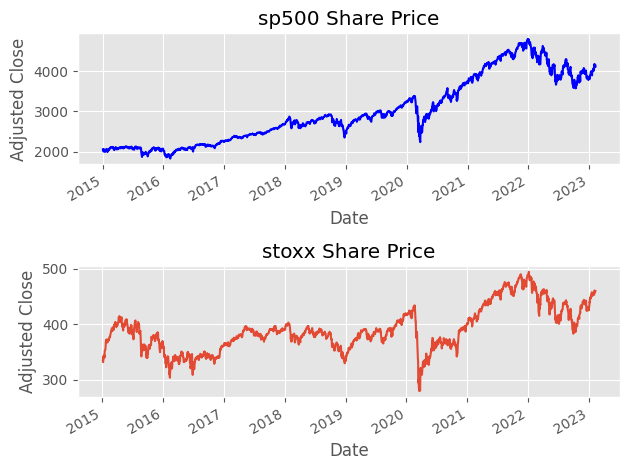

In [4]:
style.use( 'ggplot' )

plt.subplot( 211 )
sp500[ 'Adj Close' ].plot(color = 'blue')
plt.ylabel( 'Adjusted Close' )
plt.title( 'sp500 Share Price' )

plt.subplot( 212 )
stox[ 'Adj Close' ].plot( label = "STOXX" )
plt.ylabel( 'Adjusted Close' )
plt.title( 'stoxx Share Price' )

plt.tight_layout()

plt.show()




In [25]:
sp500[ '100d_ma' ] = sp500[ 'Adj Close' ].rolling( window = 100 , min_periods = 0 ).mean()
stox[ '100d_ma' ] = stox[ 'Adj Close' ].rolling( window = 100 , min_periods = 0 ).mean()


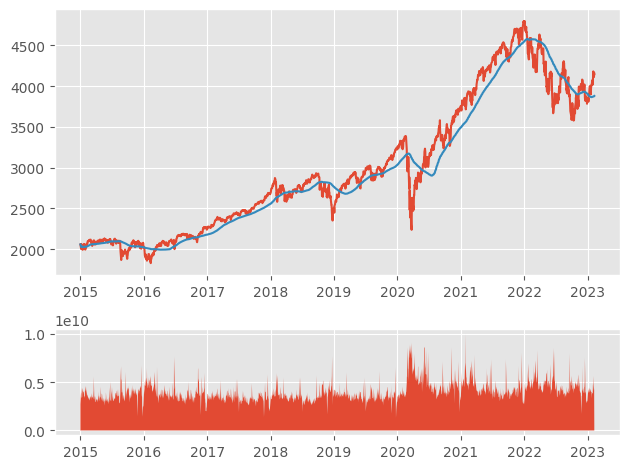

In [27]:
ax1 = plt.subplot2grid(( 6 , 1 ),( 0 , 0 ),
 rowspan = 4 , colspan = 1 )
ax2 = plt.subplot2grid(( 6 , 1 ),( 4 , 0 ),
 rowspan = 2 , colspan = 1 ,
 sharex =ax1)

ax1.plot(sp500.index, sp500[ 'Adj Close' ])
ax1.plot(sp500.index, sp500[ '100d_ma' ])
ax2.fill_between(sp500.index, sp500[ 'Volume' ])
plt.tight_layout()
plt.show()


In [38]:
#REGRESSION LINE

data = sp500['Adj Close']
x = data.index.map(mdates.date2num)


In [43]:
fit = np.polyfit(x, data.values, 1 )
fit1d = np.poly1d(fit)

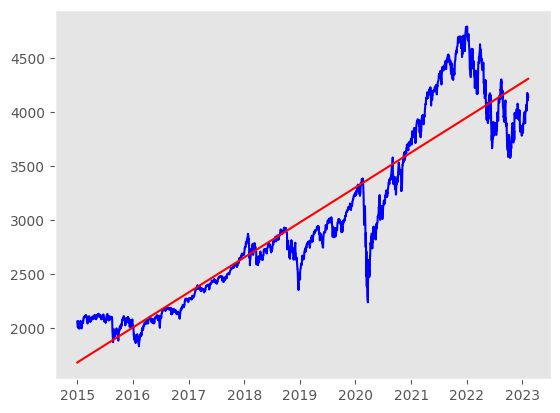

In [44]:
plt.grid()
plt.plot(data.index, data.values, 'b' )
plt.plot(data.index, fit1d(x), 'r' )
plt.show()


In [46]:
#SETTING THE TIME FRAME

rstart = dt.datetime( 2022 , 1 , 1 )
rend = dt.datetime( 2023 , 1 , 1 )

In [51]:
fit_data = data.reset_index()
pos1 = fit_data[fit_data.Date >= rstart].index[ 0 ]
pos2 = fit_data[fit_data.Date <= rend].index[- 1 ]
fit_data = fit_data.iloc[pos1:pos2]

In [53]:
dates = fit_data.Date.map(mdates.date2num)
fit = np.polyfit(dates, fit_data[ 'Adj Close' ], 1 )
fit1d = np.poly1d(fit)

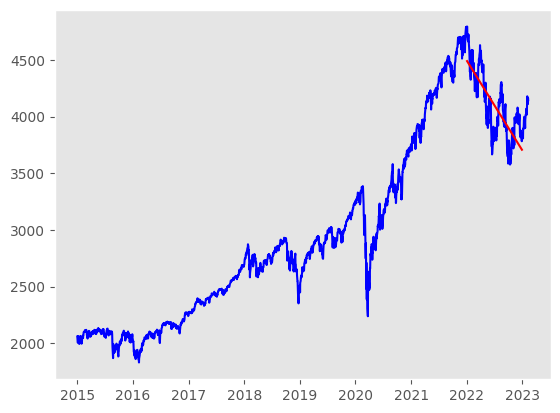

In [54]:
plt.grid()
plt.plot(data.index, data.values, 'b' )
plt.plot(fit_data.Date, fit1d(dates), 'r' )
plt.show()

**Predicting share prices**


In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
data = sp500
print(data.shape)
days = 50
data[ 'Shifted' ] = data[ 'Adj Close' ].shift(-days)

(2040, 7)


In [36]:
data = data[["Adj Close", "Shifted"]]
data.dropna( inplace = True )

C:\Users\rouje99\AppData\Local\Temp\ipykernel_4992\1364444974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna( inplace = True )


In [37]:
data.shape

(1990, 2)

In [38]:
X = np.array(data.drop([ 'Shifted' ], 1 ))
Y = np.array(data[ 'Shifted' ])
X = preprocessing.scale(X)


C:\Users\rouje99\AppData\Local\Temp\ipykernel_4992\3712564098.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([ 'Shifted' ], 1 ))


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 )


In [40]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print (accuracy)

0.9381802412581912


In [41]:
X_new = preprocessing.scale(np.array(sp500[["Adj Close", "Shifted"]].drop([ 'Shifted' ], 1 )))[-100:-50]
prediction = clf.predict(X_new)



C:\Users\rouje99\AppData\Local\Temp\ipykernel_4992\2180262241.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_new = preprocessing.scale(np.array(sp500[["Adj Close", "Shifted"]].drop([ 'Shifted' ], 1 )))[-100:-50]


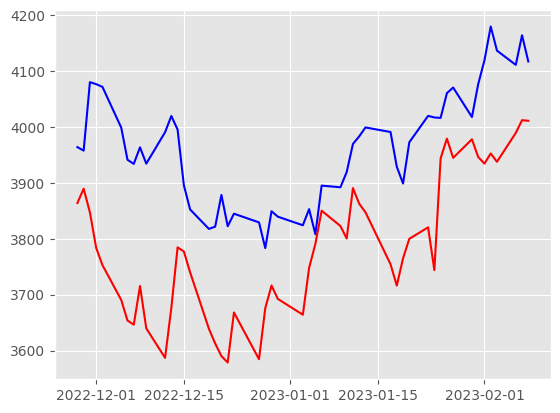

In [42]:
#prediction of the next 100 days
plt.plot(sp500.index[-50:], sp500['Adj Close'][-50:], 'b' )
plt.plot(sp500.index[-50:], prediction, 'r' )
plt.show()